modified from https://huggingface.co/agents-course/notebooks/blob/main/unit2/smolagents/tools.ipynb

In [1]:
import os

import matplotlib.pyplot as plt
from langchain.agents import load_tools
from PIL import Image as PILImage
from smolagents import CodeAgent, Tool, load_tool, tool
from utils import gemini_model_OpenAIServer

In [2]:
USERNAME = "CoralLeiCN"

In [3]:
model = gemini_model_OpenAIServer("gemini-2.0-flash")

# Generating a tool that retrieves the highest-rated catering

In [4]:
# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=model)

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ OpenAIServerModel - gemini-2.0-flash ──────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")                  
  final_answer(catering_service)                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 1: Duration 0.82 seconds| Input tokens: 2,243 | Output tokens: 65]

Gotham Catering Co.


# Defining a Tool as a Python Class

In [5]:
class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets.",
        }

        return themes.get(
            category.lower(),
            "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.",
        )


# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=model)

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ OpenAIServerModel - gemini-2.0-flash ──────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  party_theme = superhero_party_theme_generator(category='villain masquerade')                                     
  final_answer(party_theme)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 1: Duration 0.74 seconds| Input tokens: 2,273 | Output tokens: 67]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


# Sharing and Importing Tools

In [6]:
# Sharing a Tool to the Hub
party_theme_tool.push_to_hub(f"{USERNAME}/catering_service_tool")

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/CoralLeiCN/catering_service_tool/commit/b378e68d0e1bbb83cef3279d25d8bf0b1d3e7472', commit_message='Upload tool', commit_description='', oid='b378e68d0e1bbb83cef3279d25d8bf0b1d3e7472', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/CoralLeiCN/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='CoralLeiCN/catering_service_tool'), pr_revision=None, pr_num=None)

# Importing a Tool from the Hub

In [8]:
image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=model
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ OpenAIServerModel - gemini-2.0-flash ──────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor. The superheroes are original characters with        
  unique costumes and powers. The atmosphere is festive and opulent, with decorations inspired by comic books and  
  superhero lore. High-res, photorealistic."                                                                       
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(prompt=prompt)' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-schnell (Request ID:
Root=1-67df2bfe-4e1995bf669a1a4067006c4b;0144f03f-9171-45e1-8dbb-bd213b2c6ba7)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 1: Duration 1.22 seconds| Input tokens: 2,273 | Output tokens: 107]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "Luxurious superhero party at Wayne Manor with original superheroes. High-res, photorealistic."         
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(prompt=prompt)' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-schnell (Request ID:
Root=1-67df2bff-50b60e8d4c386c922abfa201;62ed9ae9-0905-472f-8ca3-27156f2d6fea)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 2: Duration 0.90 seconds| Input tokens: 4,958 | Output tokens: 197]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("I am unable to generate the image due to exceeding my monthly credits for image generation.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: I am unable to generate the image due to exceeding my monthly credits for image generation.

[Step 3: Duration 0.62 seconds| Input tokens: 8,007 | Output tokens: 259]

'I am unable to generate the image due to exceeding my monthly credits for image generation.'

# Importing a Hugging Face Space as a Tool

In [9]:
image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ OpenAIServerModel - gemini-2.0-flash ──────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  improved_prompt = "A grand superhero-themed party at Wayne Manor. The manor is lavishly decorated with           
  superhero emblems and vibrant colors. Guests include many famous superheroes in their civilian identities,       
  mingling and enjoying themselves. Alfred, the butler, oversees the luxurious gala with a watchful and            
  sophisticated demeanor, ensuring everything runs smoothly. There are gourmet food stations, superhero-themed     
  cocktails, and a live jazz band playing in the background. The atmosphere is festive and celebratory."           
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A grand superhero-themed party at Wayne Manor. The manor is lavishly decorated with superhero emblems and vibrant 
colors. Guests include many famous superheroes in their civilian identities, mingling and enjoying themselves. 
Alfred, the butler, oversees the luxurious gala with a watchful and sophisticated demeanor, ensuring everything 
runs smoothly. There are gourmet food stations, superhero-themed cocktails, and a live jazz band playing in the 
background. The atmosphere is festive and celebratory.

Out: None

[Step 1: Duration 1.38 seconds| Input tokens: 2,269 | Output tokens: 155]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/9f892e82c6d2266a8e1a650d12963813dfcb22578a5526a6b52d5c81d63fedb5/image.webp

[Step 2: Duration 8.34 seconds| Input tokens: 4,938 | Output tokens: 207]

'/tmp/gradio/9f892e82c6d2266a8e1a650d12963813dfcb22578a5526a6b52d5c81d63fedb5/image.webp'

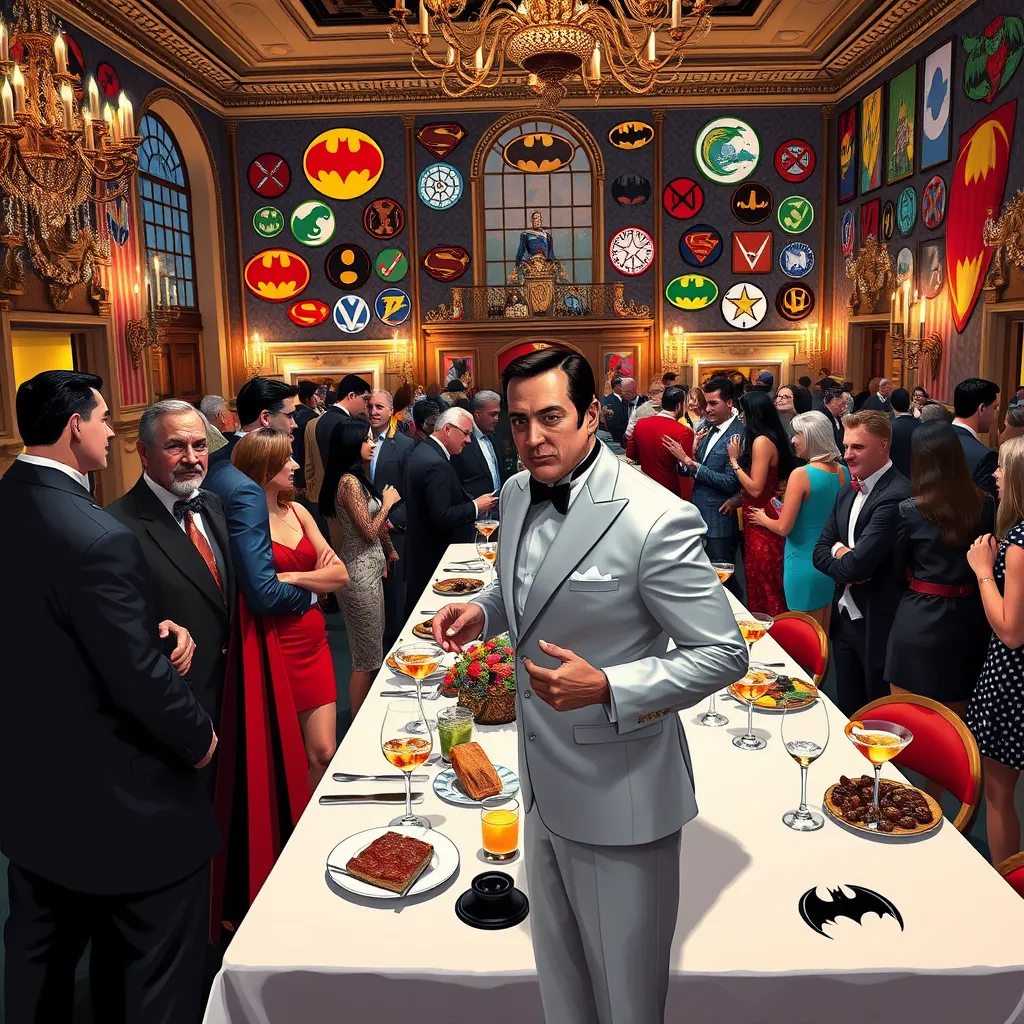

In [10]:
image_path = '/tmp/gradio/9f892e82c6d2266a8e1a650d12963813dfcb22578a5526a6b52d5c81d63fedb5/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

In [5]:
search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ OpenAIServerModel - gemini-2.0-flash ──────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search_results = search(tool_input="luxury entertainment superhero themed event")                                
  print(search_results)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Our Superhero parties are perfect for boys and girls aged 3-7 years old, and have the benefit of being 
specifically designed for every young child to enjoy.', 'The “Super Hero” themed event is all about an entertaining
and relaxed event, that attracts various generations all together!', 'Jul 19, 2012 —', 'Jul 18, 2018 —', 'Variety 
of superhero dances, games and music! Including the superman dance & lots more! This package also includes the 
toilet roll game! Lots of ...', 'Hire Iron Man for kids birthday party in your area. We have the best superhero 
characters for birthday parties or events in Michigan. Call 888.510.0513.', 'Cherry On Top Parties · 2 hour event 
{plus setup and cleanup} · Awesome superhero décor creating visual WOW, including giant cityscape backdrop and a 
phone booth!', 'Discover your inner superhero in our dress-up wardrobe and grab your favorite mask, cape, dress and
accessories to let your hidden superpowers shine! They have it all and organized a perfect party experience in such
a friendly and welcoming way, even with all my special game requirements.', 'This party lasts about 15 minutes and 
includes: up to 10 YOUNG GUESTS Signature "ACTION ENTRANCE" WARM HUGS & PICTURES WITH YOUR HERO/PIRATE AUTOGRAPHED 
...', 'May 13, 2021 - Explore Jay\' h\'s board "adult superhero party" on Pinterest. See more ideas about superhero
party, adult superhero party, superhero.']

Out: None

[Step 1: Duration 2.95 seconds| Input tokens: 2,246 | Output tokens: 54]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search_results = search(tool_input="luxury superhero event live performance interactive experience high-end")    
  print(search_results)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: explore_universal.', "This thrilling themed coach trip is the ultimate way to kick-start your 
heroic adventure, departing November 2025. It's a must-experience getaway for MARVEL ...", 'All this, with 
breathtaking decor, gourmet dining, live music, and a spectacular fire show. ... Dubai Event Management, Luxury 
Event Design, High ...', 'May 21, 2024 —', 'We are Culture House Immersive, an Avengers-style collective of leaders
in the immersive, theatrical, gaming, and technology spaces.', 'May 14, 2019 —', 'Step into a world of adventure, 
wonder and excitment at the Mighty Super Hero Circus. 13th to 23rd Feb 2025 l Bagh-e-Jinah, Open Air Theatre', 
"Explore the Marvel Exhibition in Madrid: an immersive journey into your favorite superheroes' universe with 
costumes, comics, and interactive experiences.", "Awakening, voted Best Production Show by the Southern Nevada 
Hotel Concierge Association, is the must-see show experience in Las Vegas and it's only at Wynn.", 'Explore the 
magic of Los Angeles hassle-free with CitySightseeing Hop-on, Hop-off Tour. Three diverse routes, one unbeatable 
price.', 'Come dressed as your favorite superhero and be part of the ultimate cosplay experience! Join us from 
February 13th - 23rd at Bagh-e-Jinnah Open Air Theater for ...']

Out: None

[Step 2: Duration 2.16 seconds| Input tokens: 4,960 | Output tokens: 129]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search_results = search(tool_input="luxury superhero event aerial performance stunt show interactive technology  
  virtual reality")                                                                                                
  print(search_results)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['The Marvel Experience takes the theme park model and elevates it to new levels with amazing multimedia technology
and an opportunity for fans to participate ...', 'Icarus Flight Simulator boasts the ultimate event entertainment 
as guests soar through the sky playing games and winning prizes.', 'Jun 21, 2021 —', 'Jul 19, 2023 —', 'Wandering 
among guests interacting, posing for photos and showing off incredible skills, walkabout characters can be anything
you need them to be!', 'X-Men: Days of Future Past is a 2014 superhero film directed and co-produced by Bryan 
Singer and written by Simon Kinberg from a story he created with Jane ...', "The series focuses on critical 
analysis and theory, exploring the entanglements of materiality and performativity in 'old' and 'new' media and 
seeks ...", "One of the Southeast's premier arts festivals, Artsplosure - The Raleigh Arts Festival attracts more 
than 80,000 people to downtown Raleigh during the third ...", 'Mar 20, 2023 —', 'Immersed in technology: art and 
virtual environments / edIted by Mary. Anne Moser with Douglas MacLeod for the Banff Centre for the Arts. p. en1. 
Includes ...']

Out: None

[Step 3: Duration 2.83 seconds| Input tokens: 8,155 | Output tokens: 221]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Luxury entertainment ideas for a superhero-themed event could include:\n\n*   **Aerial             
  Performances:** A choreographed aerial performance with performers dressed as superheroes, showcasing their      
  acrobatic skills.\n*   **Stunt Show:** A live-action stunt show featuring fight choreography and special         
  effects.\n*   **Interactive Technology Experiences:** Virtual reality simulations where guests can experience    
  having superpowers or participate in a superhero mission. Flight simulators can also provide an engaging         
  experience.\n*   **Walkabout Characters:** High-end costumed characters that interact with guests throughout     
  the event.\n*   **Themed Immersive Dining:** Gourmet dining experiences where the food and ambiance are themed   
  around the superhero world.\n*   **Augmented Reality Photo Booth:** A photo booth with augmented reality         
  filters that allow guests to become their favorite superheroes in photos and videos.")                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Luxury entertainment ideas for a superhero-themed event could include:

*   **Aerial Performances:** A choreographed aerial performance with performers dressed as superheroes, showcasing 
their acrobatic skills.
*   **Stunt Show:** A live-action stunt show featuring fight choreography and special effects.
*   **Interactive Technology Experiences:** Virtual reality simulations where guests can experience having 
superpowers or participate in a superhero mission. Flight simulators can also provide an engaging experience.
*   **Walkabout Characters:** High-end costumed characters that interact with guests throughout the event.
*   **Themed Immersive Dining:** Gourmet dining experiences where the food and ambiance are themed around the 
superhero world.
*   **Augmented Reality Photo Booth:** A photo booth with augmented reality filters that allow guests to become 
their favorite superheroes in photos and videos.

[Step 4: Duration 1.86 seconds| Input tokens: 11,805 | Output tokens: 446]

'Luxury entertainment ideas for a superhero-themed event could include:\n\n*   **Aerial Performances:** A choreographed aerial performance with performers dressed as superheroes, showcasing their acrobatic skills.\n*   **Stunt Show:** A live-action stunt show featuring fight choreography and special effects.\n*   **Interactive Technology Experiences:** Virtual reality simulations where guests can experience having superpowers or participate in a superhero mission. Flight simulators can also provide an engaging experience.\n*   **Walkabout Characters:** High-end costumed characters that interact with guests throughout the event.\n*   **Themed Immersive Dining:** Gourmet dining experiences where the food and ambiance are themed around the superhero world.\n*   **Augmented Reality Photo Booth:** A photo booth with augmented reality filters that allow guests to become their favorite superheroes in photos and videos.'